In [6]:
print("test")

test


In [1]:
import pandas as pd
import numpy as np

#visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#statistic
from scipy import stats

#encoder
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("../../Data/Raw/kc_house_data.csv") #use_cols = [""]

In [4]:
df = data.copy()

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df_stats = df[['price']].describe().transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0


In [7]:
iqr = df_stats['75%'] - df_stats['25%']
batas_bawah = df_stats['25%'] - (1.5*iqr)
batas_atas = df_stats['75%'] + (1.5*iqr)

outlier_landsize = [i for i in df['price'] if i < batas_bawah['price'].item() or i > batas_atas['price'].item()]

print('Count of Outliers in Column Price :', len(outlier_landsize), 'Data')

Count of Outliers in Column Price : 1146 Data


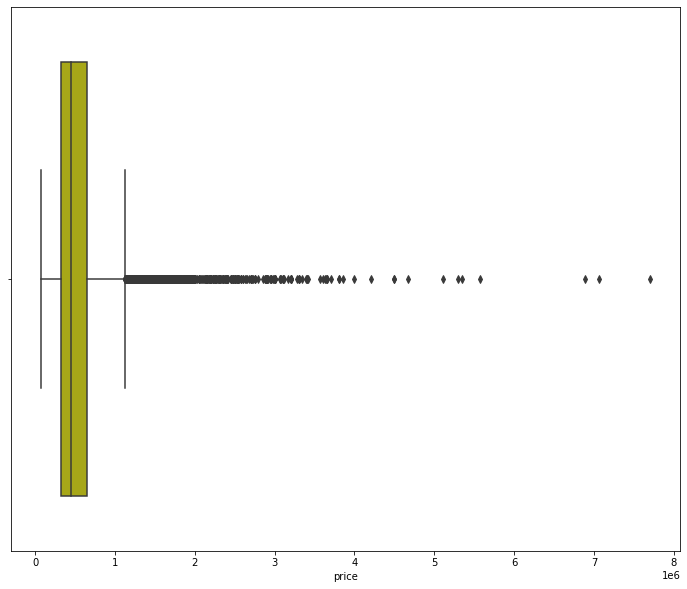

In [8]:
#Boxplot Landsize
plt.figure(figsize=(12,10))
sns.boxplot(x = df['price'], color = 'y');


In [65]:
df[df['yr_built']<1000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


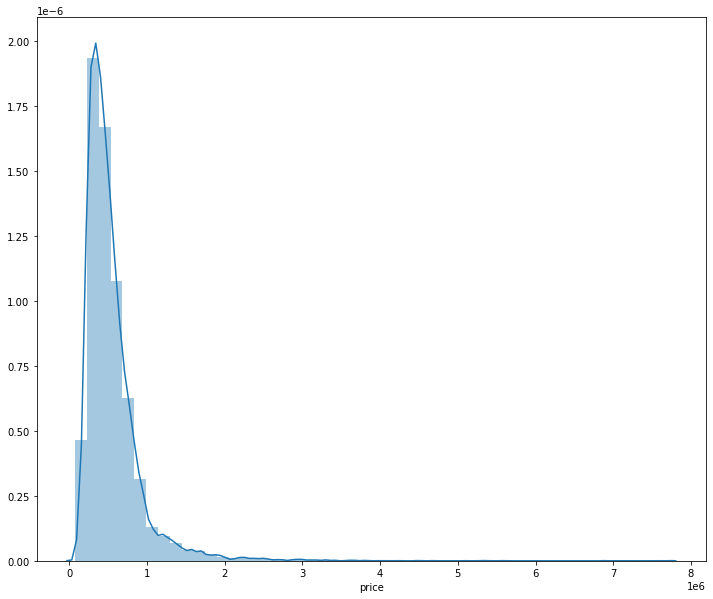

In [27]:
%matplotlib inline
plt.figure(figsize=(12,10))
sns.distplot(df['price']);

In [28]:
k2, p = stats.normaltest(df['price'])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [50]:
top_price_house_by_year= df.groupby(by="yr_built").mean().sort_values('price',ascending=False).reset_index().head(10)
top_price_house_by_year

,yr_built,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1933,3.938730e+09,772050.000000,3.133333,2.008333,2193.000000,42373.100000,1.483333,0.033333,0.933333,3.266667,7.466667,1748.000000,445.000000,464.233333,98113.966667,47.565100,-122.272633,2189.000000,21265.900000
1,2015,5.255062e+09,759785.157895,3.657895,2.763158,2596.315789,5016.289474,2.223684,0.000000,0.131579,3.000000,8.921053,2298.421053,297.894737,0.000000,98103.578947,47.616995,-122.260895,2026.052632,5551.315789
2,1905,4.427030e+09,752977.986486,3.310811,1.864865,1965.810811,10311.081081,1.621622,0.013514,0.256757,3.770270,7.472973,1641.351351,324.459459,459.486486,98110.972973,47.602680,-122.312554,1811.486486,6341.148649
3,2001,4.925783e+09,741030.796721,3.665574,2.814754,2880.708197,19736.672131,2.022951,0.013115,0.249180,3.022951,8.645902,2698.118033,182.590164,0.000000,98060.321311,47.570027,-122.137164,2490.452459,15183.875410
4,1909,4.592798e+09,696135.159574,3.191489,1.824468,1900.106383,5102.638298,1.510638,0.000000,0.234043,3.829787,7.382979,1576.063830,324.042553,339.042553,98110.893617,47.622599,-122.324340,1777.010638,4822.393617
5,2014,4.482581e+09,683681.754919,3.724508,2.746422,2615.389982,5984.756708,2.126118,0.003578,0.109123,3.000000,8.559928,2443.194991,172.194991,0.000000,98076.533095,47.549836,-122.207311,2282.046512,6235.620751
6,2000,5.035812e+09,681789.169725,3.527523,2.755734,2646.307339,26207.802752,2.032110,0.009174,0.325688,3.018349,8.587156,2443.357798,202.949541,0.000000,98069.123853,47.564745,-122.161775,2350.619266,21178.839450
7,2013,4.447780e+09,678545.452736,3.845771,2.850746,2636.592040,7338.079602,2.042289,0.000000,0.179104,3.000000,8.467662,2464.726368,171.865672,0.000000,98066.348259,47.526551,-122.143856,2340.721393,7890.442786
8,1907,4.281123e+09,676257.246154,3.261538,1.784615,1904.276923,5161.307692,1.615385,0.000000,0.169231,3.661538,7.261538,1601.661538,302.615385,429.492308,98113.030769,47.607817,-122.320046,1766.153846,4925.184615
9,1902,4.280460e+09,673007.407407,3.555556,1.925926,1919.629630,4766.518519,1.740741,0.000000,0.074074,3.629630,7.444444,1784.074074,135.555556,145.740741,98116.518519,47.616689,-122.314556,1913.703704,4576.888889


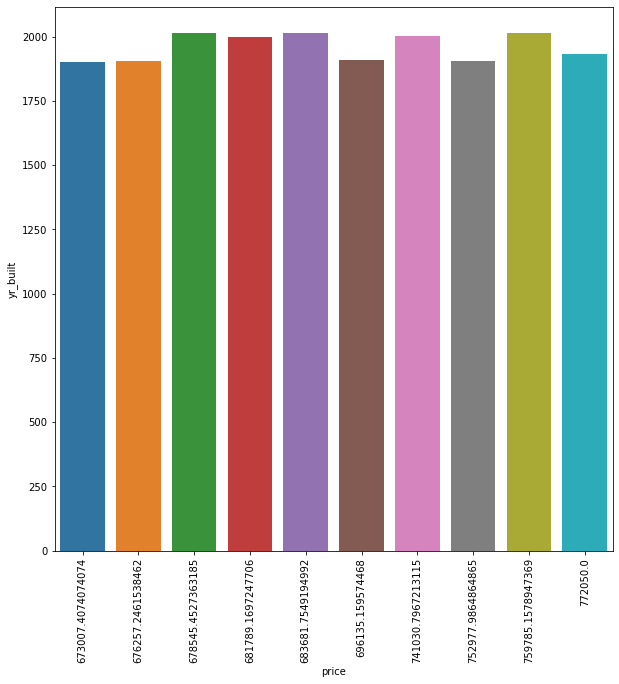

In [51]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
sns.barplot(y="yr_built", x="price", data=top_price_house_by_year);

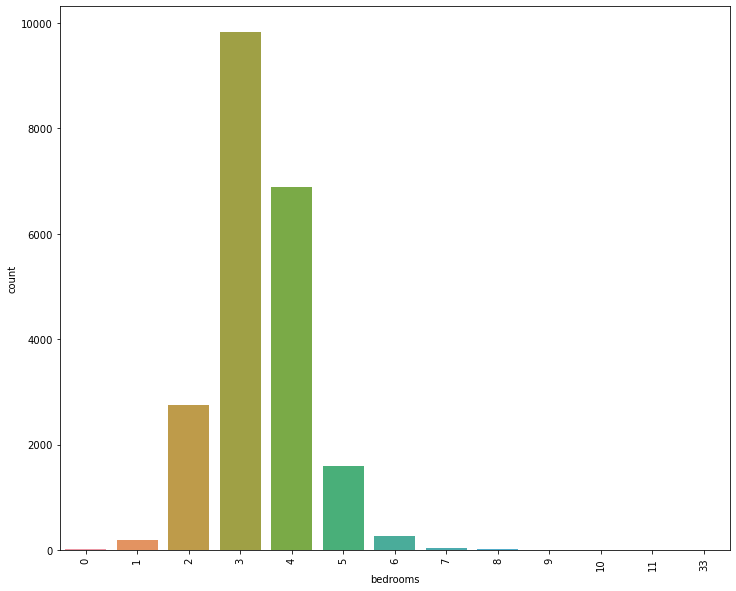

In [13]:

%matplotlib inline
plt.figure(figsize=(12,10))
sns.countplot(df['bedrooms'])
plt.xticks(rotation=90);

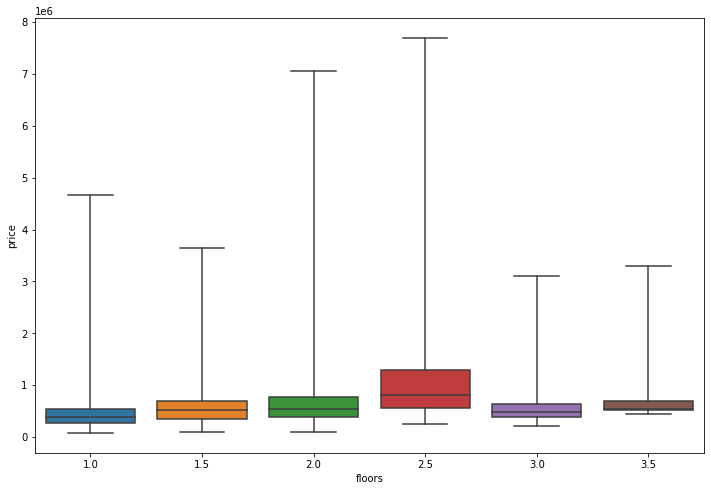

In [17]:

plt.figure(figsize=(12,8))
sns.boxplot(x='floors',y="price" ,data=df,whis=(0,100));

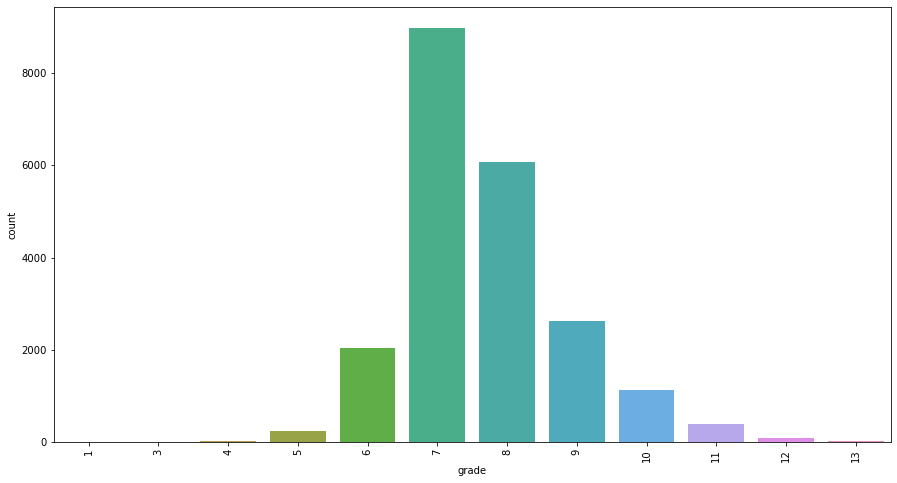

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(df['grade'])
plt.xticks(rotation=90);

In [53]:

df_meanyear = df.groupby('yr_built').mean()
df_meanyear1 = df_meanyear.reset_index()
df_meanyear1

,yr_built,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1900,5.060402e+09,581387.206897,3.275862,1.729885,1732.011494,10869.597701,1.505747,0.000000,0.252874,3.528736,6.873563,1487.068966,244.942529,435.344828,98104.655172,47.594106,-122.288874,1667.114943,7222.195402
1,1901,5.036920e+09,556935.931034,3.620690,1.577586,1763.620690,4142.931034,1.568966,0.000000,0.068966,3.655172,7.034483,1513.620690,250.000000,68.517241,98121.000000,47.630710,-122.329793,1530.965517,3947.862069
2,1902,4.280460e+09,673007.407407,3.555556,1.925926,1919.629630,4766.518519,1.740741,0.000000,0.074074,3.629630,7.444444,1784.074074,135.555556,145.740741,98116.518519,47.616689,-122.314556,1913.703704,4576.888889
3,1903,4.508135e+09,480958.195652,3.065217,1.505435,1507.739130,6364.565217,1.456522,0.021739,0.239130,3.500000,6.869565,1402.869565,104.869565,260.130435,98105.608696,47.591474,-122.287261,1537.608696,5303.760870
4,1904,4.542878e+09,583756.644444,2.911111,1.500000,1603.177778,5410.000000,1.344444,0.000000,0.066667,3.800000,6.911111,1307.177778,296.000000,266.400000,98117.933333,47.609891,-122.316822,1630.222222,4600.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2011,4.787524e+09,544522.000000,3.469231,2.640385,2313.684615,6519.692308,2.015385,0.000000,0.107692,3.000000,8.184615,2170.415385,143.269231,0.000000,98063.053846,47.522833,-122.169854,2226.715385,5630.415385
112,2012,5.149959e+09,527447.335294,3.576471,2.641176,2378.741176,6085.535294,1.994118,0.005882,0.094118,3.000000,8.182353,2276.447059,102.294118,0.000000,98062.041176,47.501455,-122.139559,2246.658824,5806.547059
113,2013,4.447780e+09,678545.452736,3.845771,2.850746,2636.592040,7338.079602,2.042289,0.000000,0.179104,3.000000,8.467662,2464.726368,171.865672,0.000000,98066.348259,47.526551,-122.143856,2340.721393,7890.442786
114,2014,4.482581e+09,683681.754919,3.724508,2.746422,2615.389982,5984.756708,2.126118,0.003578,0.109123,3.000000,8.559928,2443.194991,172.194991,0.000000,98076.533095,47.549836,-122.207311,2282.046512,6235.620751


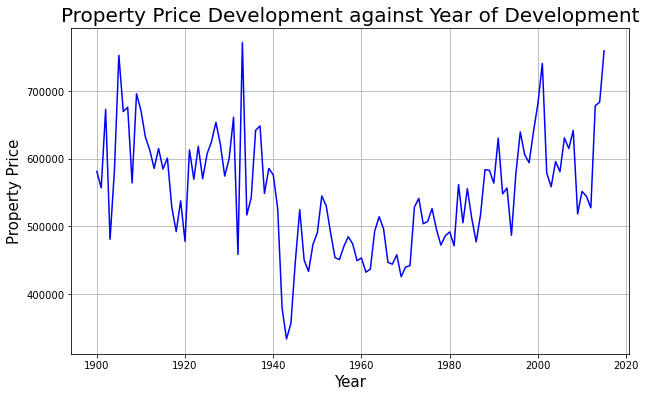

In [54]:
plt.figure(figsize = (10, 6))

x = df_meanyear1['yr_built']
y = df_meanyear1['price'] 

plt.plot(x, y, 'blue')
plt.title('Property Price Development against Year of Development', size=20)
plt.xlabel('Year', size=15) 
plt.ylabel('Property Price', size=15) 
plt.grid();

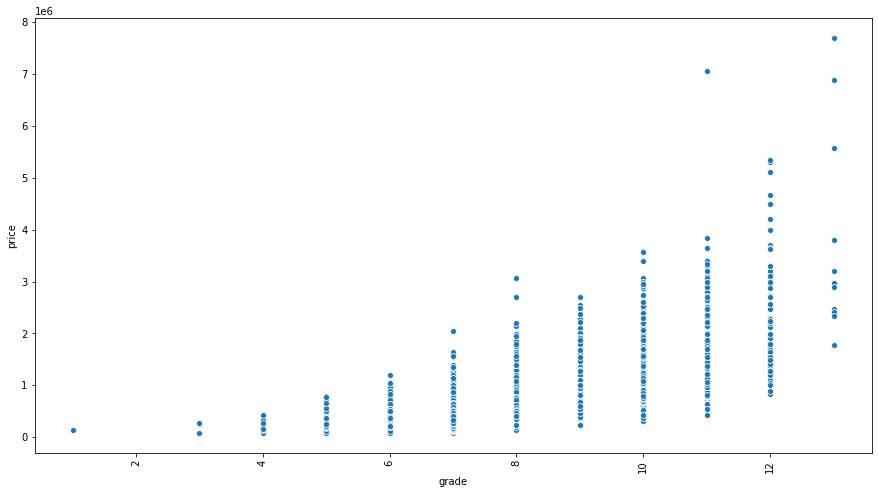

In [11]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="grade",y="price",data=df)
plt.xticks(rotation=90);